## Movie Review Sentiment Analysis Simple-RNN

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding

In [3]:
# Load the dataset

max_features = 10000 # number of words to consider as features
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=max_features)

print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}')

17464789/17464789 [==============================] - 2s 0us/step
Training data shape: (25000,), Training labels shape: (25000,)
Testing data shape: (25000,), Testing labels shape: (25000,)


In [4]:
# sample input
print(X_train[0])  # input will be in index number vector form
print(y_train[0])  # output will be in binary form (0-negative,

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [8]:
# to get the word index mapping
word_index = imdb.get_word_index()
reverse_word_index = [(value,key) for (key,value) in word_index.items()]
decoded_review = ' '.join(dict(reverse_word_index).get(i-3,'?') for i in X_train[0])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [9]:
# Padding the data for same input size
maxlen = 500
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)

In [10]:
X_train.shape, X_test.shape

((25000, 500), (25000, 500))

In [15]:
# Build the model
model = Sequential()
model.add(Embedding(max_features,128,input_shape=(maxlen,))) # input_dim,output_dim,input_shape
model.add(SimpleRNN(128))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1313025 (5.01 MB)
Trainable params: 1313025 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Compile and train the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 98s 154ms/step - loss: 0.6757 - accuracy: 0.5604 - val_loss: 0.6520 - val_accuracy: 0.5922
Epoch 2/10
625/625 [==============================] - 116s 185ms/step - loss: 0.6086 - accuracy: 0.6737 - val_loss: 0.6308 - val_accuracy: 0.6356
Epoch 3/10
625/625 [==============================] - 145s 231ms/step - loss: 0.5400 - accuracy: 0.7229 - val_loss: 0.6269 - val_accuracy: 0.6614
Epoch 4/10
625/625 [==============================] - 114s 183ms/step - loss: 0.4690 - accuracy: 0.7704 - val_loss: 0.6112 - val_accuracy: 0.6882
Epoch 5/10
625/625 [==============================] - 100s 159ms/step - loss: 0.3892 - accuracy: 0.8233 - val_loss: 0.5694 - val_accuracy: 0.7394
Epoch 6/10
625/625 [==============================] - 108s 173ms/step - loss: 0.4419 - accuracy: 0.7886 - val_loss: 0.6136 - val_accuracy: 0.7034
Epoch 7/10
625/625 [==============================] - 93s 149ms/step - loss: 0.3777 - accuracy: 0.8342 - val_loss: 0.6477 - v

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

782/782 [==============================] - 29s 37ms/step - loss: 0.6779 - accuracy: 0.6649
Test Loss: 0.6778990626335144
Test Accuracy: 0.6648799777030945


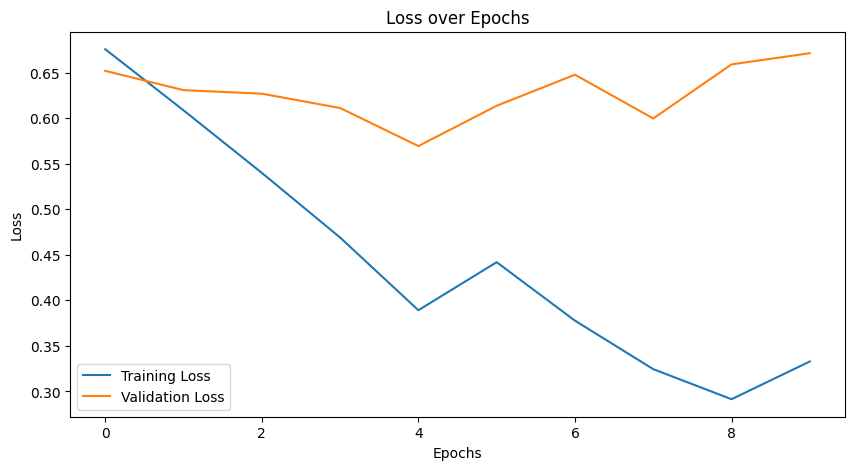

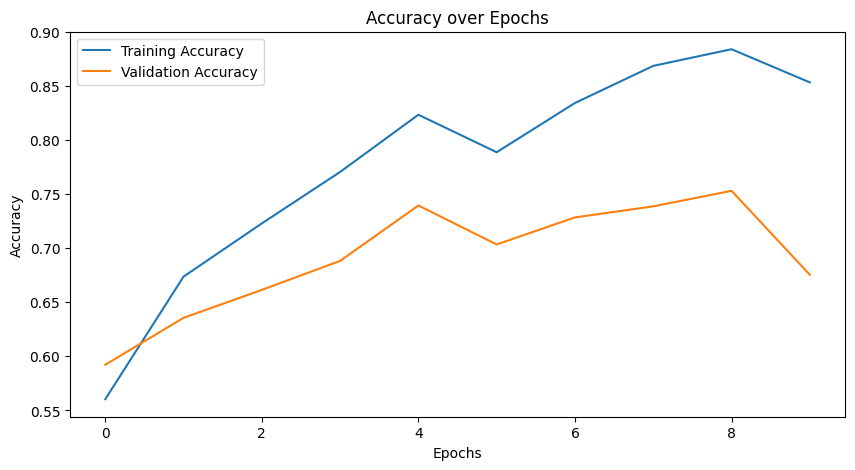

In [19]:
# Visualize training history

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [20]:
# Save the model
model.save('imdb_simplernn_model.h5')

d:\DATA_SCIENCE_A.I\Data Science\Projects\IMDB Review Senti\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
